**In this notebook we will plot the decision boundary for a logistic regression model**

In [11]:
# let's import the required libraries

import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [49]:
# let's define the sigmoid function

def sigmoid_fn(z):

    g = 1/(1+np.exp(-z))

    return g

In [50]:
# let's define the sigmoid function prediction based on a threshold value

def sigmoid_fn_pred(z):

    g = 1/(1+np.exp(-z))

    threshold = 0.5  # You can adjust this threshold
    binary_prediction = (g >= threshold).astype(int)
    return binary_prediction

In [51]:
# let's define our training data set
# Sample training data (input features X_train and corresponding labels y_train)
x_train = np.array([
    [3.2, 1.5],
    [2.5, 2.8],
    [1.9, 3.1],
    [3.6, 4.0],
    [2.8, 1.0],
    [2.0, 2.7]
])

y_train = np.array([0, 1, 1, 0, 1, 0])  # Binary labels: 0 (class 0) and 1 (class 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)

sgd = SGDRegressor(max_iter=10000, alpha=0.0001)

sgd.fit(X_train, y_train)

x_test = np.array([   [3.2, 1.5],
    [2.5, 2.8],
    [1.9, 3.1],
    [3.6, 4.0],
    [2.8, 1.0],
    [2.0, 2.7]])

# Scale the test data using the same scaler
x_test = scaler.fit_transform(x_test)

y_pred = sgd.predict(x_test)

print(f"Weight used is: {sgd.coef_}")
print(f"Bias used is: {sgd.intercept_}")
print(f"Predicted value is: {y_pred}")

y = np.dot(x_test, sgd.coef_.T) + sgd.intercept_

print(f"Predicted value is: {y}")

Weight used is: [-0.12770139 -0.06134126]
Bias used is: [0.29144914]
Predicted value is: [0.24224032 0.30893755 0.41610456 0.00501299 0.35666568 0.41973374]
Predicted value is: [0.24224032 0.30893755 0.41610456 0.00501299 0.35666568 0.41973374]


In [52]:
# let's use sigmoid function to predict value of y


y_sig = sigmoid_fn(y)

print(f"Predicted value is: {y_sig}")

Predicted value is: [0.56026567 0.57662591 0.60255073 0.50125324 0.58823305 0.60341953]


Text(0.5, 0, 'z')

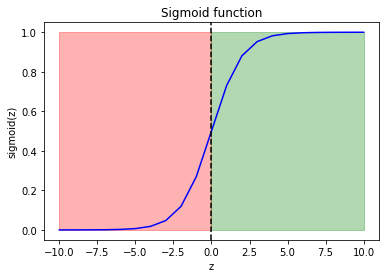

In [53]:
# let's plot distributed values of test y input to sigmoid function

y_samp = np.arange(-10,11)

sig_fn_res = sigmoid_fn(y_samp)

# Decision boundary line
decision_boundary = 0

plt.plot(y_samp, sig_fn_res, marker="", color="b")
# Add the vertical decision boundary line
plt.axvline(x=decision_boundary, linestyle="--", color="k", label="Decision Boundary")
# Fill the regions left and right of the decision boundary
# Fill the entire left side of the decision boundary as red and right side as green
plt.fill_between(y_samp, 1, where=(y_samp <= decision_boundary), color='red', alpha=0.3, label="Left Side")
plt.fill_between(y_samp, 1, where=(y_samp >= decision_boundary), color='green', alpha=0.3, label="Right Side")

plt.title("Sigmoid function")
plt.ylabel('sigmoid(z)')
plt.xlabel('z')